In [ ]:
%cd ./input/

/content/input


In [ ]:
! wget https://github.com/sakshikamal/ML-Session/blob/main/Titanic_raw_data/test.csv
! wget https://github.com/sakshikamal/ML-Session/blob/main/Titanic_raw_data/train.csv

--2023-11-17 09:52:48--  https://github.com/sakshikamal/ML-Session/blob/main/Titanic_raw_data/test.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42788 (42K) [text/plain]
Saving to: ‘test.csv.1’

test.csv.1          100%[===================>]  41.79K  --.-KB/s    in 0.05s   

2023-11-17 09:52:48 (853 KB/s) - ‘test.csv.1’ saved [42788/42788]

--2023-11-17 09:52:48--  https://github.com/sakshikamal/ML-Session/blob/main/Titanic_raw_data/train.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87981 (86K) [text/plain]
Saving to: ‘train.csv.1’

train.csv.1         100%[===================>]  85.92K  --.-KB/s    in 0.07s   

2023-11-17 09:52:49 (1.15 MB/s) - ‘train.csv.1’ saved [87981/87981]



In [ ]:
%cd ../

/content


In [ ]:
# Import necessary modules for data analysis and data visualization.
# Data analysis modules
# Pandas is probably the most popular and important modules for any work related to data management.
import pandas as pd

# numpy is a great library for doing mathmetical operations.
import numpy as np

# Some visualization libraries
from matplotlib import pyplot as plt
import seaborn as sns


## Importing the datasets
train = pd.read_csv("./input/train.csv")
test = pd.read_csv("./input/test.csv")


## Some other snippit of codes to get the setting right
## This is so that the chart created by matplotlib can be shown in the jupyter notebook.
%matplotlib inline
%config InlineBackend.figure_format = 'retina' ## This is preferable for retina display.
import warnings ## importing warnings library.
warnings.filterwarnings('ignore') ## Ignore warning
import os ## imporing os
print(os.listdir("./input/"))

['test.csv.1', 'shampoo.csv', 'train.csv', 'test.csv', 'train.csv.1']


In [ ]:
## Take a look at the overview of the dataset.
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
244,245,0,3,"Attalah, Mr. Sleiman",male,30.0,0,0,2694,7.2250,NaN,C
739,740,0,3,"Nankoff, Mr. Minko",male,NaN,0,0,349218,7.8958,NaN,S
20,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0000,NaN,S
247,248,1,2,"Hamalainen, Mrs. William (Anna)",female,24.0,0,2,250649,14.5000,NaN,S
63,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,NaN,S


In [ ]:
test.sample(5)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
234,1126,1,"Cumings, Mr. John Bradley",male,39.0,1,0,PC 17599,71.2833,C85,C
48,940,1,"Bucknell, Mrs. William Robert (Emma Eliza Ward)",female,60.0,0,0,11813,76.2917,D15,C
276,1168,2,"Parker, Mr. Clifford Richard",male,28.0,0,0,SC 14888,10.5000,NaN,S
401,1293,2,"Gale, Mr. Harry",male,38.0,1,0,28664,21.0000,NaN,S
43,935,2,"Corbett, Mrs. Walter H (Irene Colvin)",female,30.0,0,0,237249,13.0000,NaN,S


In [ ]:
## saving passenger id in advance in order to submit later.
passengerid = test.PassengerId

## Replacing the null values in the Embarked column with the mode.
train.Embarked.fillna("C", inplace=True)

## Concat train and test into a variable "all_data"
survivers = train.Survived

train.drop(["Survived"],axis=1, inplace=True)

all_data = pd.concat([train,test], ignore_index=False)

## Assign all the null values to N
all_data.Cabin.fillna("N", inplace=True)

all_data.Cabin = [i[0] for i in all_data.Cabin]

with_N = all_data[all_data.Cabin == "N"]

without_N = all_data[all_data.Cabin != "N"]

all_data.groupby("Cabin")['Fare'].mean().sort_values()

def cabin_estimator(i):
    a = 0
    if i<16:
        a = "G"
    elif i>=16 and i<27:
        a = "F"
    elif i>=27 and i<38:
        a = "T"
    elif i>=38 and i<47:
        a = "A"
    elif i>= 47 and i<53:
        a = "E"
    elif i>= 53 and i<54:
        a = "D"
    elif i>=54 and i<116:
        a = 'C'
    else:
        a = "B"
    return a


##applying cabin estimator function.
with_N['Cabin'] = with_N.Fare.apply(lambda x: cabin_estimator(x))

## getting back train.
all_data = pd.concat([with_N, without_N], axis=0)

## PassengerId helps us separate train and test.
all_data.sort_values(by = 'PassengerId', inplace=True)

## Separating train and test from all_data.
train = all_data[:891]

test = all_data[891:]

# adding saved target variable with train.
train['Survived'] = survivers

missing_value = test[(test.Pclass == 3) & (test.Embarked == "S") & (test.Sex == "male")].Fare.mean()
## replace the test.fare null values with test.fare mean
test.Fare.fillna(missing_value, inplace=True)

## dropping the three outliers where Fare is over $500
train = train[train.Fare < 500]

# Placing 0 for female and
# 1 for male in the "Sex" column.
train['Sex'] = train.Sex.apply(lambda x: 0 if x == "female" else 1)
test['Sex'] = test.Sex.apply(lambda x: 0 if x == "female" else 1)

# Creating a new colomn with a
train['name_length'] = [len(i) for i in train.Name]
test['name_length'] = [len(i) for i in test.Name]

def name_length_group(size):
    a = ''
    if (size <=20):
        a = 'short'
    elif (size <=35):
        a = 'medium'
    elif (size <=45):
        a = 'good'
    else:
        a = 'long'
    return a


train['nLength_group'] = train['name_length'].map(name_length_group)
test['nLength_group'] = test['name_length'].map(name_length_group)

## Here "map" is python's built-in function.
## "map" function basically takes a function and
## returns an iterable list/tuple or in this case series.
## However,"map" can also be used like map(function) e.g. map(name_length_group)
## or map(function, iterable{list, tuple}) e.g. map(name_length_group, train[feature]]).
## However, here we don't need to use parameter("size") for name_length_group because when we
## used the map function like ".map" with a series before dot, we are basically hinting that series
## and the iterable. This is similar to .append approach in python. list.append(a) meaning applying append on list.

## cuts the column by given bins based on the range of name_length
#group_names = ['short', 'medium', 'good', 'long']
#train['name_len_group'] = pd.cut(train['name_length'], bins = 4, labels=group_names)

## Title
## get the title from the name
train["title"] = [i.split('.')[0] for i in train.Name]
train["title"] = [i.split(',')[1] for i in train.title]
test["title"] = [i.split('.')[0] for i in test.Name]
test["title"]= [i.split(',')[1] for i in test.title]

#rare_title = ['the Countess','Capt','Lady','Sir','Jonkheer','Don','Major','Col']
#train.Name = ['rare' for i in train.Name for j in rare_title if i == j]
## train Data
train["title"] = [i.replace('Ms', 'Miss') for i in train.title]
train["title"] = [i.replace('Mlle', 'Miss') for i in train.title]
train["title"] = [i.replace('Mme', 'Mrs') for i in train.title]
train["title"] = [i.replace('Dr', 'rare') for i in train.title]
train["title"] = [i.replace('Col', 'rare') for i in train.title]
train["title"] = [i.replace('Major', 'rare') for i in train.title]
train["title"] = [i.replace('Don', 'rare') for i in train.title]
train["title"] = [i.replace('Jonkheer', 'rare') for i in train.title]
train["title"] = [i.replace('Sir', 'rare') for i in train.title]
train["title"] = [i.replace('Lady', 'rare') for i in train.title]
train["title"] = [i.replace('Capt', 'rare') for i in train.title]
train["title"] = [i.replace('the Countess', 'rare') for i in train.title]
train["title"] = [i.replace('Rev', 'rare') for i in train.title]



#rare_title = ['the Countess','Capt','Lady','Sir','Jonkheer','Don','Major','Col']
#train.Name = ['rare' for i in train.Name for j in rare_title if i == j]
## test data
test['title'] = [i.replace('Ms', 'Miss') for i in test.title]
test['title'] = [i.replace('Dr', 'rare') for i in test.title]
test['title'] = [i.replace('Col', 'rare') for i in test.title]
test['title'] = [i.replace('Dona', 'rare') for i in test.title]
test['title'] = [i.replace('Rev', 'rare') for i in test.title]

## Family_size seems like a good feature to create
train['family_size'] = train.SibSp + train.Parch+1
test['family_size'] = test.SibSp + test.Parch+1

def family_group(size):
    a = ''
    if (size <= 1):
        a = 'loner'
    elif (size <= 4):
        a = 'small'
    else:
        a = 'large'
    return a

train['family_group'] = train['family_size'].map(family_group)
test['family_group'] = test['family_size'].map(family_group)

train['is_alone'] = [1 if i<2 else 0 for i in train.family_size]
test['is_alone'] = [1 if i<2 else 0 for i in test.family_size]

train.drop(['Ticket'], axis=1, inplace=True)

test.drop(['Ticket'], axis=1, inplace=True)

## Calculating fare based on family size.
train['calculated_fare'] = train.Fare/train.family_size
test['calculated_fare'] = test.Fare/test.family_size

def fare_group(fare):
    a= ''
    if fare <= 4:
        a = 'Very_low'
    elif fare <= 10:
        a = 'low'
    elif fare <= 20:
        a = 'mid'
    elif fare <= 45:
        a = 'high'
    else:
        a = "very_high"
    return a

train['fare_group'] = train['calculated_fare'].map(fare_group)
test['fare_group'] = test['calculated_fare'].map(fare_group)

#train['fare_group'] = pd.cut(train['calculated_fare'], bins = 4, labels=groups)

train.drop(['PassengerId'], axis=1, inplace=True)

test.drop(['PassengerId'], axis=1, inplace=True)


train = pd.get_dummies(train, columns=['title',"Pclass", 'Cabin','Embarked','nLength_group', 'family_group', 'fare_group'], drop_first=False)
test = pd.get_dummies(test, columns=['title',"Pclass",'Cabin','Embarked','nLength_group', 'family_group', 'fare_group'], drop_first=False)
train.drop(['family_size','Name', 'Fare','name_length'], axis=1, inplace=True)
test.drop(['Name','family_size',"Fare",'name_length'], axis=1, inplace=True)

## rearranging the columns so that I can easily use the dataframe to predict the missing age values.
train = pd.concat([train[["Survived", "Age", "Sex","SibSp","Parch"]], train.loc[:,"is_alone":]], axis=1)
test = pd.concat([test[["Age", "Sex"]], test.loc[:,"SibSp":]], axis=1)

## Importing RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

## writing a function that takes a dataframe with missing values and outputs it by filling the missing values.
def completing_age(df):
    ## gettting all the features except survived
    age_df = df.loc[:,"Age":]

    temp_train = age_df.loc[age_df.Age.notnull()] ## df with age values
    temp_test = age_df.loc[age_df.Age.isnull()] ## df without age values

    y = temp_train.Age.values ## setting target variables(age) in y
    x = temp_train.loc[:, "Sex":].values

    rfr = RandomForestRegressor(n_estimators=1500, n_jobs=-1)
    rfr.fit(x, y)

    predicted_age = rfr.predict(temp_test.loc[:, "Sex":])

    df.loc[df.Age.isnull(), "Age"] = predicted_age


    return df

## Implementing the completing_age function in both train and test dataset.
completing_age(train)
completing_age(test);

## create bins for age
def age_group_fun(age):
    a = ''
    if age <= 1:
        a = 'infant'
    elif age <= 4:
        a = 'toddler'
    elif age <= 13:
        a = 'child'
    elif age <= 18:
        a = 'teenager'
    elif age <= 35:
        a = 'Young_Adult'
    elif age <= 45:
        a = 'adult'
    elif age <= 55:
        a = 'middle_aged'
    elif age <= 65:
        a = 'senior_citizen'
    else:
        a = 'old'
    return a

## Applying "age_group_fun" function to the "Age" column.
train['age_group'] = train['Age'].map(age_group_fun)
test['age_group'] = test['Age'].map(age_group_fun)

## Creating dummies for "age_group" feature.
train = pd.get_dummies(train,columns=['age_group'], drop_first=True)
test = pd.get_dummies(test,columns=['age_group'], drop_first=True);

"""train.drop('Age', axis=1, inplace=True)
test.drop('Age', axis=1, inplace=True)"""

# separating our independent and dependent variable
X = train.drop(['Survived'], axis = 1)
y = train["Survived"]


#age_filled_data_nor = NuclearNormMinimization().complete(df1)
#Data_1 = pd.DataFrame(age_filled_data, columns = df1.columns)
#pd.DataFrame(zip(Data["Age"],Data_1["Age"],df["Age"]))

from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X,y,test_size = .33, random_state = 0)

# Feature Scaling
## We will be using standardscaler to transform
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

## transforming "train_x"
train_x = sc.fit_transform(train_x)
## transforming "test_x"
test_x = sc.transform(test_x)

## transforming "The testset"
test = sc.transform(test)

## changing calculated_fare type
train.calculated_fare = train.calculated_fare.astype(float)

## Using StratifiedShuffleSplit
## We can use KFold, StratifiedShuffleSplit, StratiriedKFold or ShuffleSplit, They are all close cousins. look at sklearn userguide for more info.
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
cv = StratifiedShuffleSplit(n_splits = 10, test_size = .25, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%
## Using standard scale for the whole dataset.

## saving the feature names for decision tree display
column_names = X.columns

X = sc.fit_transform(X)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit, StratifiedKFold
max_depth = range(1,30)
max_feature = [21,22,23,24,25,26,28,29,30,'auto']
criterion=["entropy", "gini"]

param = {'max_depth':max_depth,
         'max_features':max_feature,
         'criterion': criterion}
grid = GridSearchCV(DecisionTreeClassifier(),
                                param_grid = param,
                                 verbose=False,
                                 cv=StratifiedKFold(n_splits=20, random_state=15, shuffle=True),
                                n_jobs = -1)
grid.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=20, random_state=15, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 30),
                         'max_features': [21, 22, 23, 24, 25, 26, 28, 29, 30,
                                          'auto']},
             verbose=False)

In [ ]:
print( grid.best_params_)
print (grid.best_score_)
print (grid.best_estimator_)

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 29}
0.8359090909090909
DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=29)


In [ ]:
dectree_grid = grid.best_estimator_
## using the best found hyper paremeters to get the score.
dectree_grid.score(X,y)

0.8558558558558559

In [ ]:
#!pip install --upgrade scikit-learn==0.22

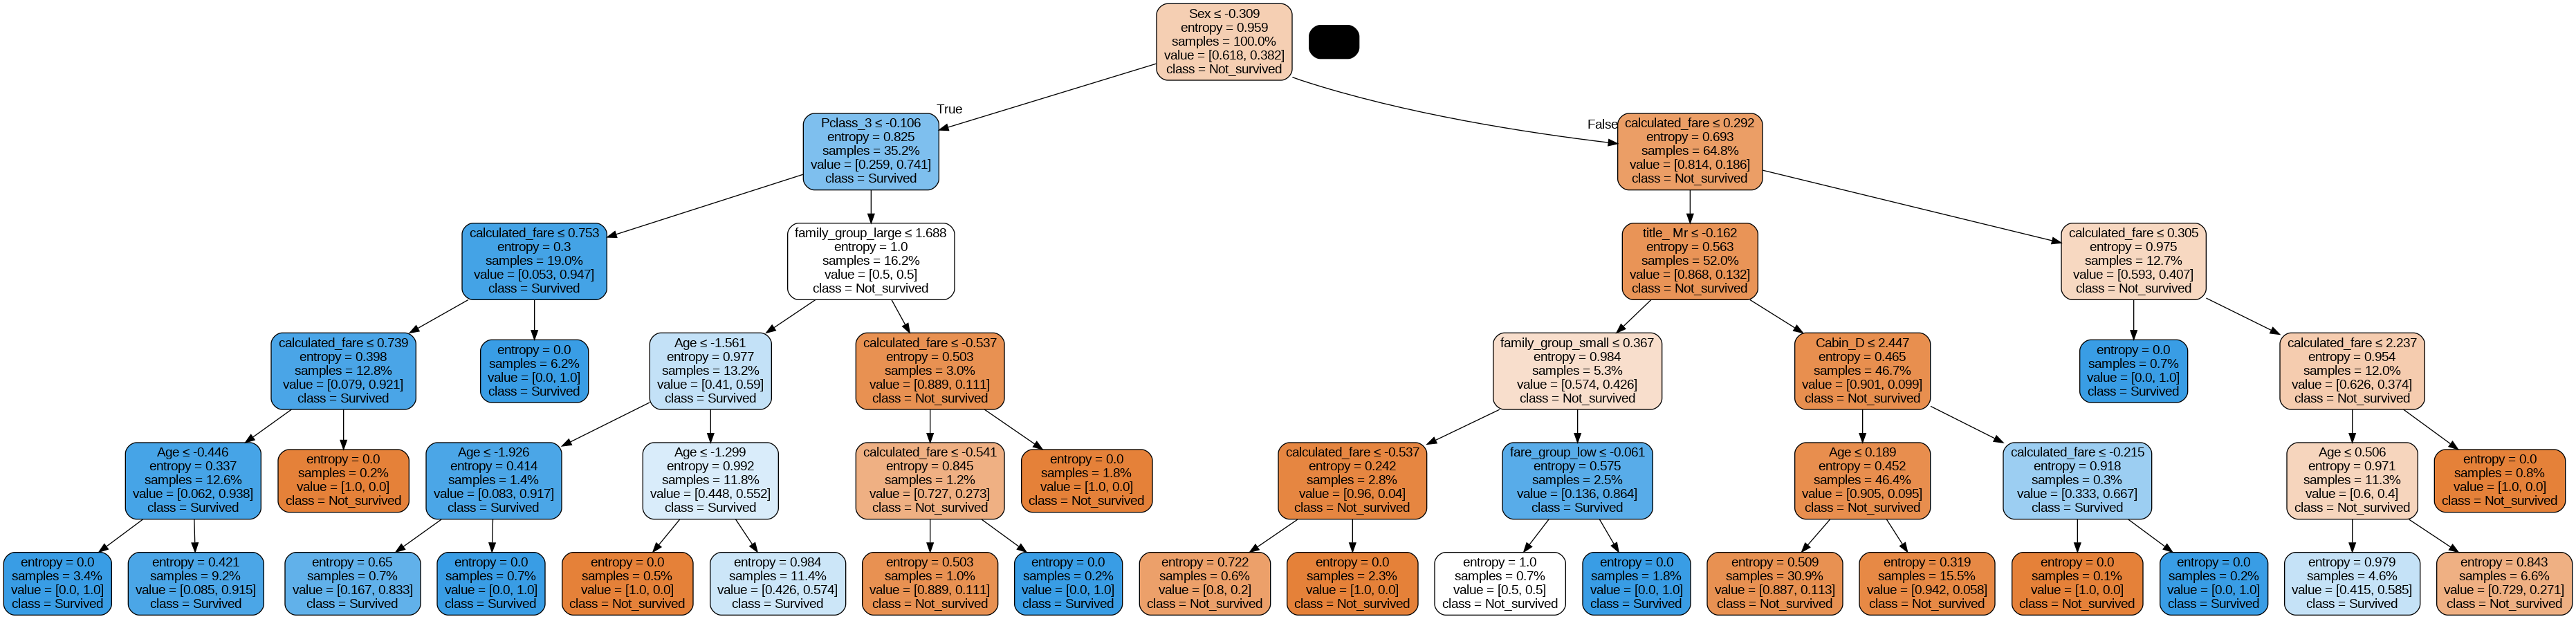

In [ ]:
#from sklearn.externals.six import StringIO
from six import StringIO
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image
dot_data = StringIO()
export_graphviz(dectree_grid, out_file=dot_data,
                feature_names=column_names,  class_names = (["Survived" if int(i) is 1 else "Not_survived" for i in y.unique()]),
                filled=True, rounded=True,
                proportion=True,
                special_characters=True)
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())

## alternative tree
#import graphviz
#from sklearn import tree
#dot_data = tree.export_graphviz(decision_tree=dectree_grid, out_file=None, feature_names=column_names, )
#graph = graphviz.Source(dot_data)
#graph.render("house")
#graph

Image(graph.create_png())

In [ ]:
## feature importance
feature_importances = pd.DataFrame(dectree_grid.feature_importances_,
                                   index = column_names,
                                    columns=['importance'])
feature_importances.sort_values(by='importance', ascending=False).head(10)

,importance
Sex,0.457410
calculated_fare,0.160872
Pclass_3,0.148887
family_group_small,0.064601
Age,0.056287
title_ Mr,0.048812
family_group_large,0.037865
fare_group_low,0.015577
Cabin_D,0.009690
nLength_group_medium,0.000000
